# Trabajo Práctico 2: Análisis con CatBoost - Organización de Datos

**Alumnos y Padrón**

    - Enrique, Alvaro Castro - 103991
    - Ivan, Conde - 102497
    - Luizaga, Ricardo - 87528

## Importamos las bibiliotecas necesarias

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
import import_ipynb
from FuncionesAux import *

importing Jupyter notebook from FuncionesAux.ipynb


## Importamos los datos y los preprocesamos

**Leemos los datos que tenemos y llamamos a las funciones que se encargarán de dejar listos los datasets.**

In [2]:
train_values,train_labels = obtenerDataTrain()
train_values_subset = prepararDataSet(train_values)
train_values_subset = dummyEncoding(train_values_subset)

# Boosting

En boosting se entrena un primer modelo sobre todo el set de entrenamiento. Luego se entrenan modelos subsiguientes a partir de los datos que el modelo anterior predijo mal. De esta forma la varianza total del ensamble es baja, porque cada modelo entrenado ponderará de forma distinta las observaciones. En general los ensambles tienen bajo sesgo, y en particular boosting logra bajar la varianza. 

A cada instancia se le asigna inicialmente un peso, luego se predice y se recalculan los pesos, restandole importancia a las bien clasificadas para entrenar al modelo siguiente.

### CatBoost

##### Dividimos el set de datos en sets de training y test

In [3]:
X_train, X_test, y_train, y_test = train_test_split(train_values_subset.values,train_labels.values.ravel())

#### Expandimos el data set:

In [4]:
train_values_subset = expandirDataSet(train_values_subset)

##### Dividimos el set de datos expandido en sets de training y test

In [5]:
X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(train_values_subset.values,train_labels.values.ravel())

### Buscamos los mejores parámetros

##### Buscamos los mejores parametros para el dataset base

In [ ]:
params = [
    {
        'n_estimators': [100, 300, 500, 600, 800],
        'learning_rate' : [0.05, 0.1],
        'max_depth' : [5, 8, 12, 15],
        'loss_function': ['MultiClass'],
        'l2_leaf_reg' : [8],
    },
]

boostingBase = CatBoostClassifier()
gridBase = GridSearchCV(boostingBase, params, n_jobs=-1)
gridBase.fit(X_train, y_train)

acc = gridBase.score(X_train, y_train)
print("[INFO] grid search accuracy: {:.2f}%".format(acc * 100))
print("[INFO] grid search best parameters: {}".format(gridBase.best_params_))

##### Buscamos los mejores parametros para el dataset expandido

In [12]:
params = [
    {
        'n_estimators': [100, 300, 500, 600, 800],
        'learning_rate' : [0.05, 0.1],
        'max_depth' : [5, 8, 12, 15],
        'loss_function': ['MultiClass'],
        'l2_leaf_reg' : [8],
    },
]

boostingExp = CatBoostClassifier()
gridExp = GridSearchCV(boostingExp, params, n_jobs=-1)
gridExp.fit(X_train_exp, y_train_exp)

acc = gridExp.score(X_train_exp, y_train_exp)
print("[INFO] grid search accuracy: {:.2f}%".format(acc * 100))
print("[INFO] grid search best parameters: {}".format(gridExp.best_params_))

0:	learn: 1.0374799	total: 463ms	remaining: 4m 37s
1:	learn: 0.9886604	total: 882ms	remaining: 4m 23s
2:	learn: 0.9474568	total: 1.29s	remaining: 4m 16s
3:	learn: 0.9139854	total: 1.7s	remaining: 4m 12s
4:	learn: 0.8857360	total: 2.13s	remaining: 4m 13s
5:	learn: 0.8615602	total: 2.54s	remaining: 4m 10s
6:	learn: 0.8401368	total: 2.95s	remaining: 4m 10s
7:	learn: 0.8219008	total: 3.35s	remaining: 4m 8s
8:	learn: 0.8066415	total: 3.76s	remaining: 4m 7s
9:	learn: 0.7934790	total: 4.17s	remaining: 4m 5s
10:	learn: 0.7816507	total: 4.58s	remaining: 4m 5s
11:	learn: 0.7703232	total: 4.99s	remaining: 4m 4s
12:	learn: 0.7608799	total: 5.41s	remaining: 4m 4s
13:	learn: 0.7520644	total: 5.81s	remaining: 4m 3s
14:	learn: 0.7453107	total: 6.2s	remaining: 4m 1s
15:	learn: 0.7383016	total: 6.6s	remaining: 4m
16:	learn: 0.7326525	total: 7.02s	remaining: 4m
17:	learn: 0.7272305	total: 7.43s	remaining: 4m
18:	learn: 0.7230222	total: 7.83s	remaining: 3m 59s
19:	learn: 0.7185462	total: 8.23s	remaining: 

159:	learn: 0.5880577	total: 1m 2s	remaining: 2m 52s
160:	learn: 0.5875606	total: 1m 3s	remaining: 2m 51s
161:	learn: 0.5867105	total: 1m 3s	remaining: 2m 51s
162:	learn: 0.5863203	total: 1m 3s	remaining: 2m 51s
163:	learn: 0.5858940	total: 1m 4s	remaining: 2m 50s
164:	learn: 0.5856184	total: 1m 4s	remaining: 2m 50s
165:	learn: 0.5849666	total: 1m 5s	remaining: 2m 50s
166:	learn: 0.5843542	total: 1m 5s	remaining: 2m 49s
167:	learn: 0.5838351	total: 1m 6s	remaining: 2m 49s
168:	learn: 0.5832973	total: 1m 6s	remaining: 2m 49s
169:	learn: 0.5829481	total: 1m 6s	remaining: 2m 49s
170:	learn: 0.5824986	total: 1m 7s	remaining: 2m 49s
171:	learn: 0.5819594	total: 1m 7s	remaining: 2m 49s
172:	learn: 0.5815771	total: 1m 8s	remaining: 2m 48s
173:	learn: 0.5812849	total: 1m 8s	remaining: 2m 48s
174:	learn: 0.5808320	total: 1m 9s	remaining: 2m 47s
175:	learn: 0.5804721	total: 1m 9s	remaining: 2m 47s
176:	learn: 0.5801306	total: 1m 9s	remaining: 2m 47s
177:	learn: 0.5798455	total: 1m 10s	remaining:

312:	learn: 0.5323360	total: 2m 3s	remaining: 1m 53s
313:	learn: 0.5321437	total: 2m 4s	remaining: 1m 53s
314:	learn: 0.5317697	total: 2m 4s	remaining: 1m 52s
315:	learn: 0.5314431	total: 2m 5s	remaining: 1m 52s
316:	learn: 0.5311456	total: 2m 5s	remaining: 1m 52s
317:	learn: 0.5306724	total: 2m 5s	remaining: 1m 51s
318:	learn: 0.5301755	total: 2m 6s	remaining: 1m 51s
319:	learn: 0.5299486	total: 2m 6s	remaining: 1m 50s
320:	learn: 0.5297431	total: 2m 7s	remaining: 1m 50s
321:	learn: 0.5294916	total: 2m 7s	remaining: 1m 50s
322:	learn: 0.5290569	total: 2m 7s	remaining: 1m 49s
323:	learn: 0.5287867	total: 2m 8s	remaining: 1m 49s
324:	learn: 0.5285902	total: 2m 8s	remaining: 1m 48s
325:	learn: 0.5283241	total: 2m 9s	remaining: 1m 48s
326:	learn: 0.5279244	total: 2m 9s	remaining: 1m 48s
327:	learn: 0.5276720	total: 2m 9s	remaining: 1m 47s
328:	learn: 0.5274351	total: 2m 10s	remaining: 1m 47s
329:	learn: 0.5271216	total: 2m 10s	remaining: 1m 46s
330:	learn: 0.5268934	total: 2m 11s	remainin

466:	learn: 0.4914483	total: 3m 6s	remaining: 53s
467:	learn: 0.4911886	total: 3m 6s	remaining: 52.6s
468:	learn: 0.4908180	total: 3m 6s	remaining: 52.2s
469:	learn: 0.4905815	total: 3m 7s	remaining: 51.8s
470:	learn: 0.4904574	total: 3m 7s	remaining: 51.4s
471:	learn: 0.4901532	total: 3m 8s	remaining: 51s
472:	learn: 0.4898784	total: 3m 8s	remaining: 50.6s
473:	learn: 0.4897365	total: 3m 8s	remaining: 50.2s
474:	learn: 0.4895397	total: 3m 9s	remaining: 49.8s
475:	learn: 0.4893437	total: 3m 9s	remaining: 49.4s
476:	learn: 0.4891086	total: 3m 10s	remaining: 49s
477:	learn: 0.4889418	total: 3m 10s	remaining: 48.6s
478:	learn: 0.4888079	total: 3m 10s	remaining: 48.2s
479:	learn: 0.4886400	total: 3m 11s	remaining: 47.8s
480:	learn: 0.4883940	total: 3m 11s	remaining: 47.4s
481:	learn: 0.4880923	total: 3m 12s	remaining: 47s
482:	learn: 0.4878293	total: 3m 12s	remaining: 46.6s
483:	learn: 0.4876616	total: 3m 12s	remaining: 46.2s
484:	learn: 0.4874013	total: 3m 13s	remaining: 45.8s
485:	learn:

### Evaluamos las métricas

##### Utilizando el dataset base

In [ ]:
boostingBase = CatBoostClassifier(max_depth=gridBase.best_params_["max_depth"],\
                                          learning_rate=gridBase.best_params_["learning_rate"],\
                                          n_estimators=gridBase.best_params_["n_estimators"],loss_function='MultiClass')
boostingBase.fit(X_train, y_train)
preds = boostingBase.predict(X_test)
f1_score(y_test, preds, average='micro')

##### Utilizando el dataset expandido

In [6]:
boostingExp = CatBoostClassifier(max_depth=12,\
                                          learning_rate=0.1,\
                                          n_estimators=600,loss_function='MultiClass', l2_leaf_reg=8)
boostingExp.fit(X_train_exp, y_train_exp)
preds = boostingExp.predict(X_test_exp)
f1_score(y_test_exp, preds, average='micro')

0:	learn: 1.0376936	total: 143ms	remaining: 1m 25s
1:	learn: 0.9908134	total: 552ms	remaining: 2m 44s
2:	learn: 0.9495810	total: 945ms	remaining: 3m 8s
3:	learn: 0.9163448	total: 1.34s	remaining: 3m 19s
4:	learn: 0.8893963	total: 1.74s	remaining: 3m 26s
5:	learn: 0.8647760	total: 2.13s	remaining: 3m 30s
6:	learn: 0.8438307	total: 2.52s	remaining: 3m 33s
7:	learn: 0.8257077	total: 2.92s	remaining: 3m 36s
8:	learn: 0.8091200	total: 3.34s	remaining: 3m 39s
9:	learn: 0.7945102	total: 3.75s	remaining: 3m 41s
10:	learn: 0.7819227	total: 4.18s	remaining: 3m 44s
11:	learn: 0.7716447	total: 4.62s	remaining: 3m 46s
12:	learn: 0.7621675	total: 5.03s	remaining: 3m 46s
13:	learn: 0.7536016	total: 5.43s	remaining: 3m 47s
14:	learn: 0.7457885	total: 5.84s	remaining: 3m 47s
15:	learn: 0.7393168	total: 6.24s	remaining: 3m 47s
16:	learn: 0.7334483	total: 6.65s	remaining: 3m 48s
17:	learn: 0.7279714	total: 7.07s	remaining: 3m 48s
18:	learn: 0.7227920	total: 7.47s	remaining: 3m 48s
19:	learn: 0.7182479	to

158:	learn: 0.5849260	total: 1m 1s	remaining: 2m 50s
159:	learn: 0.5846509	total: 1m 1s	remaining: 2m 49s
160:	learn: 0.5841573	total: 1m 2s	remaining: 2m 49s
161:	learn: 0.5837990	total: 1m 2s	remaining: 2m 49s
162:	learn: 0.5832124	total: 1m 2s	remaining: 2m 48s
163:	learn: 0.5827577	total: 1m 3s	remaining: 2m 48s
164:	learn: 0.5823199	total: 1m 3s	remaining: 2m 47s
165:	learn: 0.5820864	total: 1m 4s	remaining: 2m 47s
166:	learn: 0.5816765	total: 1m 4s	remaining: 2m 47s
167:	learn: 0.5811581	total: 1m 4s	remaining: 2m 46s
168:	learn: 0.5807380	total: 1m 5s	remaining: 2m 46s
169:	learn: 0.5801448	total: 1m 5s	remaining: 2m 45s
170:	learn: 0.5798471	total: 1m 5s	remaining: 2m 45s
171:	learn: 0.5795090	total: 1m 6s	remaining: 2m 45s
172:	learn: 0.5789821	total: 1m 6s	remaining: 2m 44s
173:	learn: 0.5786161	total: 1m 7s	remaining: 2m 44s
174:	learn: 0.5782472	total: 1m 7s	remaining: 2m 43s
175:	learn: 0.5777725	total: 1m 7s	remaining: 2m 43s
176:	learn: 0.5774995	total: 1m 8s	remaining: 

312:	learn: 0.5297293	total: 2m 2s	remaining: 1m 51s
313:	learn: 0.5294259	total: 2m 2s	remaining: 1m 51s
314:	learn: 0.5291892	total: 2m 2s	remaining: 1m 51s
315:	learn: 0.5287615	total: 2m 3s	remaining: 1m 50s
316:	learn: 0.5285868	total: 2m 3s	remaining: 1m 50s
317:	learn: 0.5281162	total: 2m 4s	remaining: 1m 50s
318:	learn: 0.5279673	total: 2m 4s	remaining: 1m 49s
319:	learn: 0.5275192	total: 2m 4s	remaining: 1m 49s
320:	learn: 0.5273289	total: 2m 5s	remaining: 1m 48s
321:	learn: 0.5270293	total: 2m 5s	remaining: 1m 48s
322:	learn: 0.5266570	total: 2m 6s	remaining: 1m 48s
323:	learn: 0.5263400	total: 2m 6s	remaining: 1m 47s
324:	learn: 0.5260633	total: 2m 7s	remaining: 1m 47s
325:	learn: 0.5257857	total: 2m 7s	remaining: 1m 47s
326:	learn: 0.5256165	total: 2m 7s	remaining: 1m 46s
327:	learn: 0.5252283	total: 2m 8s	remaining: 1m 46s
328:	learn: 0.5250466	total: 2m 8s	remaining: 1m 45s
329:	learn: 0.5249014	total: 2m 9s	remaining: 1m 45s
330:	learn: 0.5246242	total: 2m 9s	remaining: 

466:	learn: 0.4895205	total: 3m 4s	remaining: 52.5s
467:	learn: 0.4892987	total: 3m 4s	remaining: 52.1s
468:	learn: 0.4890042	total: 3m 5s	remaining: 51.7s
469:	learn: 0.4888335	total: 3m 5s	remaining: 51.3s
470:	learn: 0.4884244	total: 3m 5s	remaining: 50.9s
471:	learn: 0.4881841	total: 3m 6s	remaining: 50.5s
472:	learn: 0.4879851	total: 3m 6s	remaining: 50.1s
473:	learn: 0.4876178	total: 3m 7s	remaining: 49.7s
474:	learn: 0.4874570	total: 3m 7s	remaining: 49.3s
475:	learn: 0.4872399	total: 3m 7s	remaining: 48.9s
476:	learn: 0.4870415	total: 3m 8s	remaining: 48.5s
477:	learn: 0.4867256	total: 3m 8s	remaining: 48.2s
478:	learn: 0.4863790	total: 3m 9s	remaining: 47.8s
479:	learn: 0.4860939	total: 3m 9s	remaining: 47.4s
480:	learn: 0.4859128	total: 3m 9s	remaining: 47s
481:	learn: 0.4857413	total: 3m 10s	remaining: 46.6s
482:	learn: 0.4854672	total: 3m 10s	remaining: 46.2s
483:	learn: 0.4851977	total: 3m 11s	remaining: 45.8s
484:	learn: 0.4849257	total: 3m 11s	remaining: 45.4s
485:	learn

0.7312550843425273

## Predicciones sobre el nuevo archivo

Obtenemos y preparamos el nuevo archivo realizando el mismo preprocesamiento hecho anteriormente.

Dado que obtuvimos mejores resultados utilizando el boosting que utiliza el dataset expandido y con los parametros encontrados mediante  Gridsearch será este el que utilizaremos para predecir sobre el nuevo archivo.

In [7]:
test_values = obtenerDataTest()
test_values_subset = prepararDataSet(test_values)
test_values_subset = dummyEncoding(test_values_subset)
test_values_subset = expandirDataSet(test_values_subset)

In [8]:
predictions = boostingExp.predict(test_values_subset)

In [9]:
submission_format = pd.read_csv('submission_format.csv', index_col='building_id')
my_submission = pd.DataFrame(data=predictions,
                             columns=submission_format.columns,
                             index=submission_format.index)
my_submission.to_csv('submission.csv')

Text(0.5, 0, 'CatBoost Feature Importance')

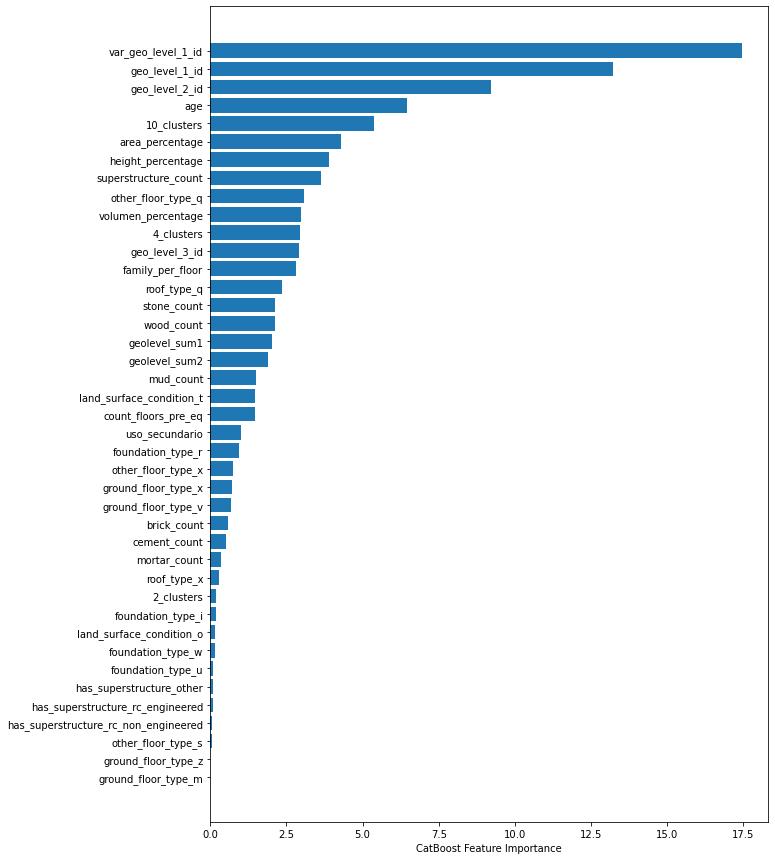

In [11]:
plt.figure(figsize=(10,15))
sorted_idx = boostingExp.feature_importances_.argsort()
plt.barh(train_values_subset.columns[sorted_idx], boostingExp.feature_importances_[sorted_idx])
plt.xlabel("CatBoost Feature Importance")